# Price-Volume Factor Backtesting Framework for a Share

Price-volume factor is an important kind of factor in alpha strategies for stocks. Normally, these kind of factors can be described as mathematical formulas, for example, delta(Close, 5)/delay(Close, 5), which means the pct_change of the close price in the past five days. We can use this way to generate a lot of price-volume factors.

## data

To compute factors, we need stock data about price and volume, such as open, high, low, close, volume, amount. I have prepared the data in the data folder.

In [1]:
from factor.load_data import local_data

In [2]:
local_data

{'Amount': ticker            000001        000002      000004        000005  \
 date                                                               
 2010-01-04  5.802495e+08  1.034345e+09         0.0  1.334784e+08   
 2010-01-05  1.293477e+09  1.910014e+09         0.0  3.915752e+08   
 2010-01-06  9.444537e+08  1.405757e+09         0.0  3.051329e+08   
 2010-01-07  8.041663e+08  1.188788e+09         0.0  1.865434e+08   
 2010-01-08  6.506674e+08  1.117118e+09         0.0  9.824470e+07   
 ...                  ...           ...         ...           ...   
 2020-06-03  1.308782e+09  2.538105e+09  67171166.0  1.420082e+07   
 2020-06-04  7.887076e+08  1.927952e+09  74324762.0  1.676385e+07   
 2020-06-05  5.172321e+08  1.710520e+09  54038771.0  1.308916e+07   
 2020-06-08  8.021158e+08  1.887552e+09  37354117.0  7.847927e+06   
 2020-06-09  6.468958e+08  1.935525e+09  42632602.0  7.442675e+06   
 
 ticker            000006        000007      000008        000009       000010  \
 date    

In [3]:
local_data['Open']

ticker,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,603990,603991,603992,603993,603995,603996,603997,603998,603999,605001
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.933302,8.102114,10.00,6.01,3.509974,4.726675,1.387229,4.792870,2.987506,9.181150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.684173,7.848222,10.00,5.95,3.444917,4.626674,1.387229,4.744941,2.952505,9.019480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.522401,7.728744,10.00,6.13,3.342685,4.780008,1.387229,4.601155,2.902505,8.738685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.409161,7.736212,10.00,6.03,3.361272,4.773341,1.387229,4.548869,2.932505,8.662104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.279743,7.676473,10.00,5.80,3.314803,4.626674,1.387229,4.662155,2.787505,8.517452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-03,13.640000,27.400000,29.29,2.66,5.000000,8.660000,3.020000,7.030000,3.890000,10.280000,...,46.31,27.00,16.50,3.53,23.93,2.25,7.03,6.56,5.84,NaN
2020-06-04,13.530000,27.020000,29.00,2.65,5.100000,8.100000,3.030000,7.010000,3.880000,11.330000,...,43.95,28.20,16.57,3.52,23.76,2.25,7.13,6.55,5.82,NaN
2020-06-05,13.600000,26.650000,29.78,2.68,5.100000,8.140000,3.000000,7.370000,3.980000,11.800000,...,43.10,28.20,16.27,3.66,23.65,2.24,7.12,6.50,6.00,23.02


## function

Function is an important part for this framwork. By combining functions and factor, you can create more complex factors. The following is a list of functions:

1.rank(a): compute the rank of a for each stock at the same.\
2.delta(a, n): compute the difference between the value of a and the value of the a n periods ago.\
3.a+b: add a and b together.\
4.a-b: subtract b from a.\
5.a*b: multiply a and b.\
6.a/b: divide b from a.\
7.power(a, b): a^b.\
8.signedpower(a, b): sign(a)*a^b.\
9.delay(a, n): compute the value of a n periods ago.\
10.corr(a, b, n): compute the correlation of a and b according to the data now and the past n-1 periods.\
11.cov(a, b, n): compute the covriance of a and b according to the data now and the past n-1 periods.\
12.exp(a): e^x.\
13.log(a): ln(a).\
14.sign(a): sign(a).\
15.arccos(a): arccos(a).\
16.arcsin(a): arcsin(a).\
17.arctan(a): arctan(a).\
18.arccosh(a): arccosh(a).\
19.arcsinh(a): arcsinh(a).\
20.arctanh(a): arctanh(a).\
21.cos(a): cos(a).\
22.sin(a): sin(a).\
23.tan(a): tan(a).\
24.cosh(a): cosh(a).\
25.tanh(a): tanh(a).\
26.abs(a): abs(a).\
27.ceiling(a): ceiling(a).\
28.floor(a): floor(a).\
29.tsmin(a, n): compute the minimal of a now and the past n-1 periods.\
30.tsmax(a, n): compute the maximal of a now and the past n-1 periods.\
31.tsrank(a, n): compute the rank of a now and the past n-1 periods.\
32.std(a, n): compute the stdandard deviation of a according to the data now and in the past n-1 periods.\
33.maximum(a, b): compute the max value in a and b.\
34.minimum(a, b): compute the min value in a and b.\
35.multiminimum(*a): compute the min value in two or more variables.\
36.multimaximum(*a): compute the max value in two or more variables.\
37.sum(a, n): comoute the sum of the value of a now and in the past n-1 periods.\
38.product(a, n): compute the product of the value of a now and in the past n-1 periods.\
39.scale(a): a/sum(a).\
40.tsmean(a, n): the rolling mean of a with window n.\
41.argmin(a, n): the rolling position of the min value of a now and in the past n-1 periods.\
42.argmax(a, n): the rolling position of the max value of a now and in the past n-1 periods.\
43.decayexp(a, f, n): the exponential decay smooth of a with window n and the decay rate f.\
44.decaylinear(a, n): the linear decay smooth of a with window n.\
45.a!=b: if a is not equal to b, return True. Otherwise return False.\
46.a<b: if a is less than b, return True. Otherwise return False.\
47.a>b: if a is greater than b, return True. Otherwise return False.\
48.a>=b: if a is greater than or equal to b, return True. Otherwise return False.\
49.a==b: if a is equal to b, return True. Otherwise return False.\
50.a&b: a and b.\
51.a|b: a or b.\
52.-a: -a.\
53.a?b:c : if condition a is True, return b, otherwise return c.

In [8]:
from factor.load_data import local_data
from factor.compute_engine import ComputeEngine

In [9]:
self.get_local_basics_data(local_data)
self.compute_factor("(Close>Open)?Close:Open")

ticker,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,603990,603991,603992,603993,603995,603996,603997,603998,603999,605001
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.933302,8.102114,10.00,6.01,3.509974,4.726675,1.387229,4.792870,2.987506,9.181150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.684173,7.848222,10.00,6.20,3.444917,4.793341,1.387229,4.744941,2.952505,9.019480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,7.522401,7.736212,10.00,6.13,3.355076,4.793341,1.387229,4.601155,2.930005,8.798247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,7.409161,7.736212,10.00,6.03,3.361272,4.773341,1.387229,4.683941,2.932505,8.662104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,7.312098,7.728744,10.00,5.89,3.407741,4.686674,1.387229,4.910513,2.865005,8.679122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-03,13.640000,27.400000,29.29,2.66,5.140000,8.660000,3.020000,7.030000,3.930000,11.520000,...,46.31,28.33,16.50,3.53,23.93,2.26,7.12,6.56,5.84,NaN
2020-06-04,13.570000,27.020000,29.90,2.68,5.120000,8.120000,3.030000,7.470000,3.930000,11.760000,...,43.95,28.20,16.57,3.68,23.76,2.36,7.13,6.55,6.04,NaN
2020-06-05,13.600000,26.650000,29.78,2.68,5.100000,8.280000,3.000000,7.370000,4.080000,11.800000,...,43.30,28.50,16.29,3.66,23.84,2.30,7.12,6.50,6.00,23.02


## Backtesting of Factor

In [11]:
from factor.load_data import local_data
from backtest import BacktestingEngine

2021-05-10 00:16:50.085197 ——INFO—— Factor: High-Low has been computed
0
2021-05-10 00:16:53.797346 ——INFO—— Factor: delta(Open,1)/delay(Open,1) has been computed
date
2020-06-09   -0.006252
2020-06-08    0.001815
2020-06-05   -0.001552
2020-06-04   -0.000796
2020-06-03   -0.001053
                ...   
2010-01-08   -0.012249
2010-01-07    0.020435
2010-01-06    0.001581
2010-01-05   -0.010301
2010-01-04         NaN
Name: close, Length: 2535, dtype: float64


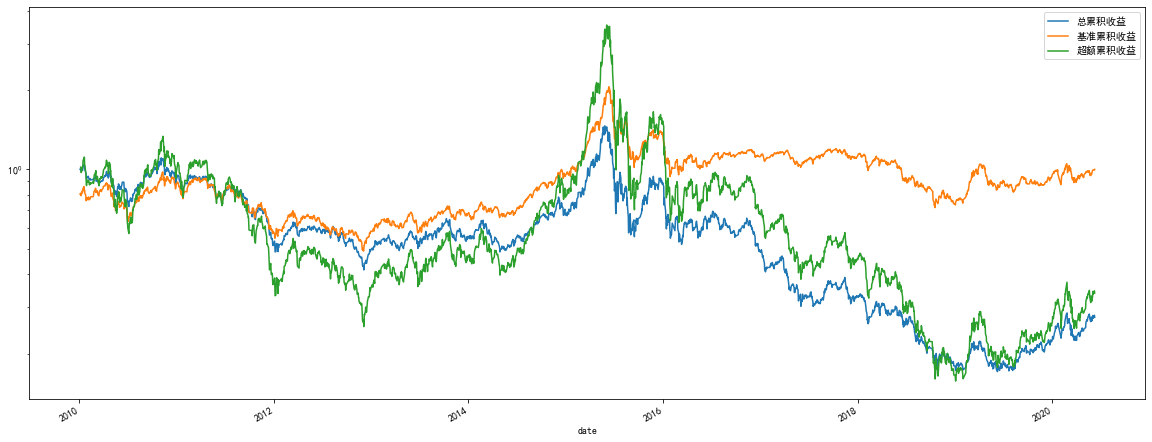

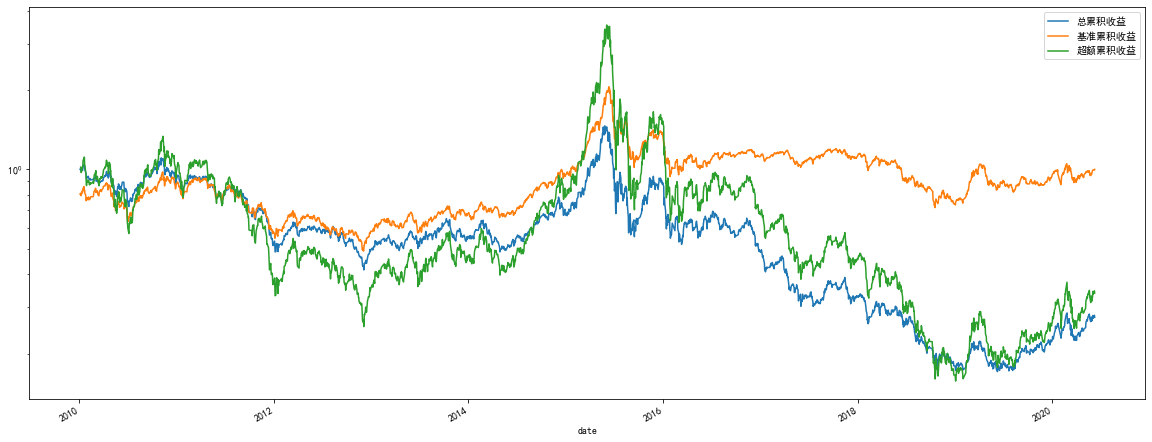

In [12]:
self = BacktestingEngine()
self.get_local_basics_data(local_data)
self.add_factor("High-Low")
self.cross_select()
self.return_cal()
self.result_statistic.plot()

### parameters

The backtesting has many parameters. The following is a list of parameters:\
n_long: the number of stocks be longed\
n_short: the number of stocks be shorted\
pct_long: the pct of stocks be longed\
pct_short: the pct of stocks be shorted\
freq: the frequency of rebalance\
rate: the trading rate

2021-05-10 00:41:34.868071 ——INFO—— Factor: High-Low has been computed
0
2021-05-10 00:41:38.550164 ——INFO—— Factor: delta(Open,1)/delay(Open,1) has been computed
date
2020-06-09   -0.006252
2020-06-08    0.001815
2020-06-05   -0.001552
2020-06-04   -0.000796
2020-06-03   -0.001053
                ...   
2010-01-08   -0.012249
2010-01-07    0.020435
2010-01-06    0.001581
2010-01-05   -0.010301
2010-01-04         NaN
Name: close, Length: 2535, dtype: float64


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


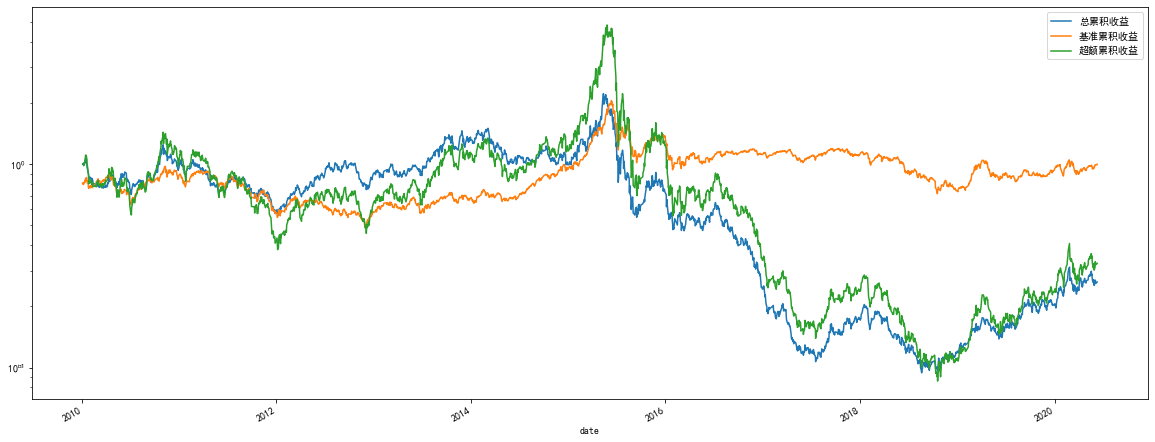

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


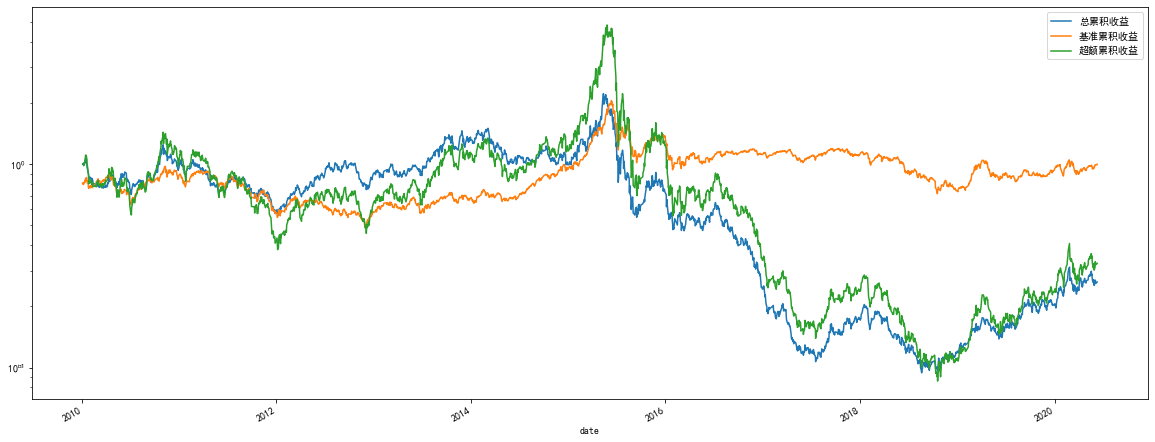

In [16]:
self = BacktestingEngine()
self.set_parameters({'n_long':5})
self.get_local_basics_data(local_data)
self.add_factor("High-Low")
self.cross_select()
self.return_cal()
self.result_statistic.plot()